### Let's load and Prepare our data

In [1]:
## import all relevant libraries
import numpy as np
import pandas as pd
import os
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline 




In [2]:
##lets load our dataset
df = pd.read_csv('../chapter_5/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
##lets normalize all the column names in our dataset
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
##lets check for column types
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [5]:
##lets normalize the values in the our dataset
##lets select all columns with string values
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [6]:
##lets now change the column type of totalcharges to a numeric type
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
##lets fill the emplty values with zeros
df['totalcharges'] = df['totalcharges'].fillna(0)

df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [7]:
## lets change the values of predicted values in numerical values
df.churn = (df.churn == 'yes').astype(int)

### Split our data in train, validation, and test sets. 

In [8]:
##lets import all relevarant libraries
from sklearn.model_selection import train_test_split

##lets alocate 20% of our data to the test set
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

## lets allocate 33 percent to our val set and the rest to train set
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state =11)

##lets select our target data
y_train = df_train.churn.values
y_val = df_val.churn.values

## lets delete the target data from our training data
del df_train['churn']
del df_val['churn']

In [9]:
## lets create a list of columns with categorical data
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod' ]

## lets create a list of columns with numerical data
numerical = ['tenure', 'monthlycharges',  'totalcharges']

In [10]:
## check for unique values in each columns 
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Simple feature:: by converting all our categorical vals to numerical vals

In [11]:
##lets import all relevant libraries
from sklearn.feature_extraction import DictVectorizer

## converting our dataframe into a list of dictionaries
train_dict = df_train[categorical + numerical].to_dict(orient='records')

## lets instantiate the 
dv = DictVectorizer(sparse=False)

##
dv.fit(train_dict)

##
X_train = dv.transform(train_dict)

### Train our base model

In [12]:
##import all relevant libraries
from sklearn.linear_model import LogisticRegression

## create an instante
model = LogisticRegression(solver='liblinear', random_state=1)

##train our model
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

### Evaluate our models performance 

In [13]:
##
val_dict = df_val[categorical + numerical].to_dict(orient='records')

#dv.fit(val_di

X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:,1]

### Small subset

In [14]:
small_subset = ['contract', 'tenure', 'totalcharges']

train_dict_small_subset = df_train[small_subset].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

dv.fit(train_dict_small_subset)

X_small_train = dv.transform(train_dict_small_subset)

In [15]:
##lets train
from sklearn.linear_model import LogisticRegression

model_small = LogisticRegression(solver='liblinear', random_state=1)

model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [16]:
##lets evaluate our model
val_dict_small_subset = df_val[small_subset].to_dict(orient='records')

#dv.fit(val_dict_small_subset)

X_small_val = dv.transform(val_dict_small_subset)

y_pred_small = model_small.predict_proba(X_small_val)[:,1]

### Accuracy

In [17]:
##get the predictions from our model
y_pred = model.predict_proba(X_val)[:,1]

## make hard predictions
churn = y_pred >= 0.5

## computes the accuracy
(y_val == churn).mean()


0.8016129032258065

In [18]:
from sklearn.metrics import accuracy_score

##lets create an area with different thresholds
thresholds = np.linspace(0,1,11)

##lets loop over our threshold values
for t in thresholds:
    ##lets make the hard predictions
    churn = y_pred >= t
    ##lets use accuracy_score from scikit learn
    acc = accuracy_score(y_val, churn)
    ##lets print the thresholds and the accuracy values to std ouput
    print('%0.2f %0.3f' % (t, acc))

0.00 0.261
0.10 0.595
0.20 0.690
0.30 0.755
0.40 0.782
0.50 0.802
0.60 0.790
0.70 0.774
0.80 0.742
0.90 0.739
1.00 0.739


### Lets visualize our accuracy score with respect to each threshold value

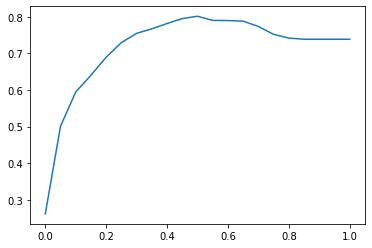

In [19]:
thresholds = np.linspace(0,1,21)

##
accuracies = []

##
for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    
plt.plot(thresholds, accuracies)

In [20]:
## lets also compute the accuracy on our validation set
val_dict_small = df_val[small_subset].to_dict(orient='records')

X_small_val = dv.transform(val_dict_small)

y_pred_small = model_small.predict_proba(X_small_val)[:,1]

churn_small = y_pred_small >= 0.5
accuracy_score(y_val, churn_small)

0.7672043010752688

### Dummy baseline

In [21]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)
baseline

array([False, False, False, ..., False, False, False])

In [22]:
accuracy_score(baseline, y_val)

0.7387096774193549

### Confusioin table 
This refers to a table that concisely represents every possible outcome of our models predictions.
Namely; True Positve, True Negative, False Positive, and False Negative.

In [23]:
##lets set our predictions at the threshold value of 0.5 
t = 0.5 
predicted_churn = (y_pred >= t)
predicted_no_churn = (y_pred < t)

## lets get the actual targets 
actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

## lets computes true positives 
true_positive = (predicted_churn & actual_churn).sum()
false_positive = (predicted_churn & actual_no_churn).sum()

##lets computes true negatives
true_negative = (predicted_no_churn & actual_no_churn).sum()
false_negative = (predicted_no_churn & actual_churn).sum()

In [24]:
##lets put all the values together
confusion_table = np.array(
    [[true_negative, false_positive],
    [false_negative, true_positive]]
)

confusion_table

array([[1202,  172],
       [ 197,  289]])

In [25]:
confusion_table / confusion_table.sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

In [26]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall 

(0.6268980477223427, 0.5946502057613169)

### Evaluating a model at multiple thresholds 

In [27]:
## lets create a list where we'll keep the results
scores = []

## lets create an array with different threshold values

## lets loop through them...
thresholds = np.linspace(0, 1, 101)

## computes the confusion table for predictions at each threshold
for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    
    ##lets append the resutls to the score list
    scores.append((t, tp, fp, fn, tn))

    
## lets turn the list into a pandas dataframe 
df_scores = pd.DataFrame(scores)

##assigns names to the columns of the dataframe 
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [28]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,486,1374,0,0
10,0.1,458,726,28,648
20,0.2,421,512,65,862
30,0.3,380,350,106,1024
40,0.4,337,257,149,1117
50,0.5,289,172,197,1202
60,0.6,200,105,286,1269
70,0.7,99,34,387,1340
80,0.8,7,1,479,1373
90,0.9,0,0,486,1374


In [29]:
##lets compute the TPR and FPR scores
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [30]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,458,726,28,648,0.942387,0.528384
20,0.2,421,512,65,862,0.866255,0.372635
30,0.3,380,350,106,1024,0.781893,0.254731
40,0.4,337,257,149,1117,0.693416,0.187045
50,0.5,289,172,197,1202,0.594650,0.125182
60,0.6,200,105,286,1269,0.411523,0.076419
70,0.7,99,34,387,1340,0.203704,0.024745
80,0.8,7,1,479,1373,0.014403,0.000728
90,0.9,0,0,486,1374,0.000000,0.000000


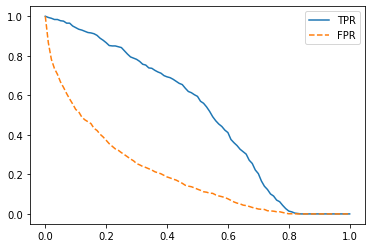

In [31]:
plt.plot(df_scores.threshold, df_scores.tpr, linestyle='solid' , label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, linestyle='dashed',  label='FPR')
plt.legend()

### Random baseline model  
This model outputs a random score between 0 and 1, regardless of the input. 

In [32]:
##lets create a function to cal TRP and FPR at diff thresholds
def tpr_fpr_dataframe(y_val, y_pred):
    """
    Defines a function that takes in actual and predicted values
    """
    ##empty list of scores
    scores = []
    
    ##create an numpy array of threholds value
    thresholds = np.linspace(0, 1, 101)
    
    ##cal the confusion table for different thresholds
    
    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()
        scores.append((t, tp, fp, fn, tn))
     
    ##lets converts the confusion table numbers to a dataframe
    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    
    ##cal TPR and FPR using the confusion table numbers
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [33]:
##lets fix the random seet 
np.random.seed(1)

##generate an array with random numbers b/n 0 and 1
y_rand = np.random.uniform(0, 1, size=len(y_val))

##lets use this function to cal the TPR and FPR
df_rand = tpr_fpr_dataframe(y_val, y_rand)

##display 
df_rand[::10]


,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,440,1236,46,138,0.905350,0.899563
20,0.2,392,1101,94,273,0.806584,0.801310
30,0.3,339,972,147,402,0.697531,0.707424
40,0.4,288,849,198,525,0.592593,0.617904
50,0.5,239,723,247,651,0.491770,0.526201
60,0.6,193,579,293,795,0.397119,0.421397
70,0.7,152,422,334,952,0.312757,0.307132
80,0.8,98,302,388,1072,0.201646,0.219796
90,0.9,57,147,429,1227,0.117284,0.106987


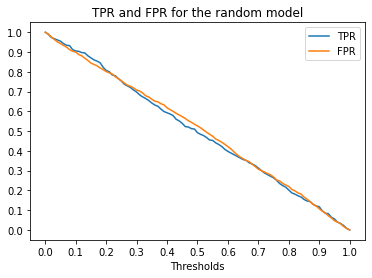

In [34]:
plt.figure(figsize=(6,4))

plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the random model')

plt.show()

## The Ideal model 
The Ideal model always make a correct prediction


In [35]:
##lets calculates the number of neg and posi examples in the dataset. 
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

##lets generates an array that first repeats 0s num_neg num of times, 
##followed by 1s repeated num_pos number of times 
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

##computes the TPR and FPR curves for classifier
df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)



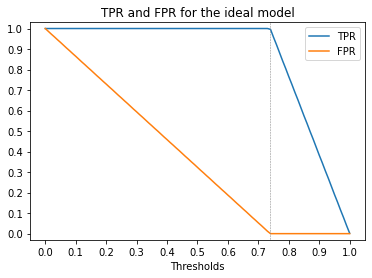

In [36]:
plt.figure(figsize=(6,4))

plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()

plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0, 1, 11))

plt.vlines(1 - y_val.mean(), -1, 2, linewidth=0.5, linestyle='dashed', color='grey')
plt.ylim(-0.03, 1.03)

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the ideal model')
plt.show()

### ROC curve

Text(0.5, 1.0, 'ROC curve')

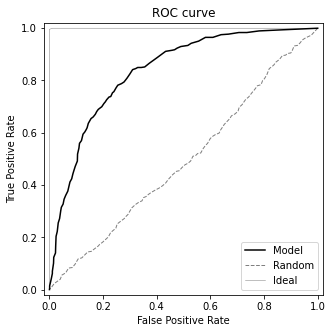

In [37]:
##lets make the plot square
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black', label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, color='black', lw=1, linestyle='dashed', alpha=0.5, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, color='black', lw=0.5, linestyle='solid', alpha=0.5, label='Ideal')
plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')


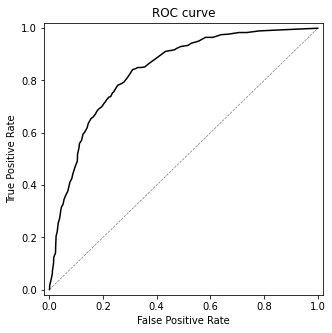

In [38]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

# plt.savefig('04_roc_curve.svg')

plt.show()

### Plotting ROC Curve using Scikit learn

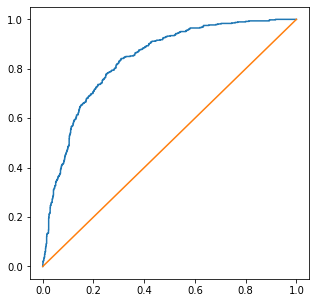

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])

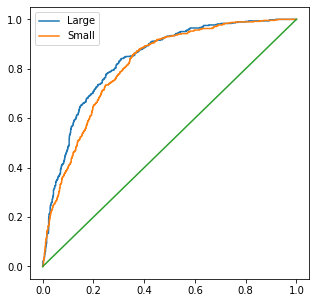

In [40]:
##Lets plot the ROC curve of small and large models 
fpr_large, tpr_large, _ = roc_curve(y_val, y_pred)
fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)

plt.figure(figsize=(5,5))

plt.plot(fpr_large, tpr_large, label='Large')
plt.plot(fpr_small, tpr_small, label='Small')
plt.plot([0,1], [0,1])
plt.legend()

### Area under the ROC (AUC) 

In [41]:
from sklearn.metrics import auc

auc(df_scores.fpr, df_scores.tpr)

0.8359001084215382

In [42]:
##lets cal auc for the small model


In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8363366398907399

### Let's put all the code for training into a train function, which first converts the data into a one-hot encoding representation and then trains the model.

In [44]:
def train(df, y):
    ##applies one-hot encoding
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    
    X = dv.transform(cat)
    ##trains the model
    model = LogisticRegression(solver='liblinear')
    
    model.fit(X, y)
    
    return dv, model

Likewise, we also put the prediction logic into a predict function. 
This function takes in a dataframe with customers,
the vectorizer we “trained” previously — for doing onehot encoding — and the model. 
Then we apply the vectorizer to the dataframe, get a matrix, 
and finally apply the model to the matrix to get predictions

In [45]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

Let's use these functions for implementing K-fold cross-validation.


In [46]:
##lets import the KFold class
from sklearn.model_selection import KFold

## lets use it to split the data into 10 parts
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

## creates a list for storing the resutls 
aucs = []

##lets iterate over the 10 diff splits of the data
for train_idx, val_idx in kfold.split(df_train_full):
    ##lets splits the data into train and validation sets
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    
    y_train = df_train.churn.values
    y_val = df_val.churn.values 
    
    #trains the model and makes predictions
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    ## lets evaluate the quality of the train on the validation data using AUC
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)
    

In [47]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.842 ± 0.012


### Finding the best parameters
Let’s select our cross-validation procedure for selecting the best parameter C. For
that, we first adjust the train function to take in an additional parameter

In [48]:
def train(df, y, C):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    
    dv.fit(cat)
    
    X = dv.transform(cat)
    
    ##lets use the parameter during training
    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)
    
    return dv, model

 let’s find the best parameter C. The idea is simple:
 Loop over different values of C.
For each C, run cross-validation and record the mean AUC across all folds as
well as the standard deviation

In [49]:
##Tuning the model: selecting the best parameter C usinng cross-validation
nfolds = 5
kfolds = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
    
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]
        
        y_train = df_train.churn.values
        y_val = df_val.churn.values
        
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
        
    print('C=%s, auc = %0.3f += %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.826 += 0.016
C=0.01, auc = 0.840 += 0.012
C=0.1, auc = 0.842 += 0.012
C=0.5, auc = 0.842 += 0.012
C=1, auc = 0.842 += 0.012
C=10, auc = 0.842 += 0.012


Let's train the model on the entire train and validation
datasets and apply it to the test dataset to verify it indeed works well.
Let’s use our train and predict functions for that:

In [50]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values

##lets train the modelon the full training dataset
dv, model = train(df_train_full, y_train, C=0.5)
##applies it to the test dataset
y_pred = predict(df_test, dv, model)

## evaluates the predictions on the test data
auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.858


In [51]:
customer = {
'customerid': '8879-zkjof',
'gender': 'female',
'seniorcitizen': 0,
'partner': 'no',
'dependents': 'no',
'tenure': 41,
'phoneservice': 'yes',
'multiplelines': 'no',
'internetservice': 'dsl',
'onlinesecurity': 'yes',
'onlinebackup': 'no',
'deviceprotection': 'yes',
'techsupport': 'yes',
'streamingtv': 'yes',
'streamingmovies': 'yes',
'contract': 'one_year',
'paperlessbilling': 'yes',
'paymentmethod': 'bank_transfer_(automatic)',
'monthlycharges': 79.85,
'totalcharges': 3320.75,
}

In [52]:
## lets use the predict function to predict if the customer is going to churn or not
## convert the customer data into a pandas dataframe 
df = pd.DataFrame([customer])
##call the predict function
y_pred = predict(df, dv, model)
y_pred[0]

0.0618756855983274

In [53]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict('records')
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred 

In [54]:
## lets create a function to predict the prob of churn for a single customer only
def predict_single(customer, dv, model):
    ## vectorizes the customer: creates the matri
    X = dv.transform([customer])
    ## applies the model to this matrix 
    y_pred = model.predict_proba(X)[:,1]
    ## lets return the first element of the result
    return y_pred[0]

In [55]:
##
predict_single(customer, dv, model)

0.0618756855983274

# Deploying machine learning models 
## Using the model 


### lets create an instance of a customer and predict whether the customer churn or not

In [56]:
## lets create an instance of a customer 
customer = {

"customerid": "8879-zkjof",
"gender": "female",
"seniorcitizen": 0,
"partner": "no",
"dependents": "no",
"tenure": 41,
"phoneservice": "yes",
"multiplelines": "no",
"internetservice": "dsl",
"onlinesecurity": "yes",
"onlinebackup": "no",
"deviceprotection": "yes",
"techsupport": "yes",
"streamingtv": "yes",
"streamingmovies": "yes",
"contract": "one_year",
"paperlessbilling": "yes",
"paymentmethod": "bank_transfer_(automatic)",
"monthlycharges": 79.85,
"totalcharges": 3320.75,
    
    
}

In [57]:
## lets use the predict function to predict the customer instance 
df = pd.DataFrame([customer])
y_pred = predict(df, dv, model)
y_pred[0]

0.0618756855983274

In [58]:

def predict_single(customer, dv, model):
    X = dv.transform([customer])
    y_pred = model.predict_proba(X)[:,1]
    return y_pred[0]

In [59]:
predict_single(customer, dv, model)

0.0618756855983274

### Using Pickle to save and load the model

### SAVING THE MODEL

In [60]:
import pickle
## lets spcify the file where we want to save
with open('churn-model.bin', 'wb') as f_out:
    ## lets save the model to file with Pickle
    ## and the DictVectorizer
    pickle.dump((dv,model), f_out)

### LOADING THE MODEL

In [61]:
## lets open the file read mode
with open('churn-model.bin', 'rb') as f_in:
    ## lets load the tuple and unpack it
    dv,model = pickle.load(f_in)

### Let’s create a simple Python script that loads the model and applies it to a customer. We will call this file churn_serving.py

## Model serving 

### Lets create a Flask app called 'flask_test.py', by creating a simple function and making it available as web service.

### Web services 
flast_test.py 

#### Serving churn model with Flask 
Thus, to make it possible for the campaign service to get predictions from the <br>
churn service, we need to create a /predict route that accepts POST requests. The <br>
churn service will parse JSON data about a customer and respond in JSON as well (figure 5.4)

In [3]:
import requests

In [4]:
## lets create an instance of a customer 
customer = {

"customerid": "8879-zkjof",
"gender": "female",
"seniorcitizen": 0,
"partner": "no",
"dependents": "no",
"tenure": 41,
"phoneservice": "yes",
"multiplelines": "no",
"internetservice": "dsl",
"onlinesecurity": "yes",
"onlinebackup": "no",
"deviceprotection": "yes",
"techsupport": "yes",
"streamingtv": "yes",
"streamingmovies": "yes",
"contract": "one_year",
"paperlessbilling": "yes",
"paymentmethod": "bank_transfer_(automatic)",
"monthlycharges": 79.85,
"totalcharges": 3320.75,
    
    
}


In [5]:
url = 'http://localhost:9696/predict'
response = requests.post(url, json=customer)
result = response.json()
print(result)

{'churn': False, 'churn_probability': 0.0618756855983274}


In [8]:
host = 'churn-serving-env.eba-unugcta9.us-west-2.elasticbeanstalk.com'
url = 'http://%s/predict' % host
response = requests.post(url, json=customer)
result = response.json()
print(result) 

{'churn': False, 'churn_probability': 0.0618756855983274}
